Exp 5 : SMOTE

In [14]:
from imblearn.over_sampling import SMOTE
from matplotlib import pyplot
from numpy import where
import pandas as pd

df = pd.read_csv(
    "C:\\Users\\DELL\\Desktop\\College\\Practicals-Apr-2025\\ADS_codes\\ADS Datasets\\Churn_Modelling.csv"
)
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


   CreditScore  Age  Exited
0          619   42       1
1          608   41       0
2          502   42       1
3          699   39       0
4          850   43       0
5          645   44       1
6          822   50       0
7          376   29       1
8          501   44       0
9          684   27       0


<Axes: xlabel='CreditScore', ylabel='Age'>

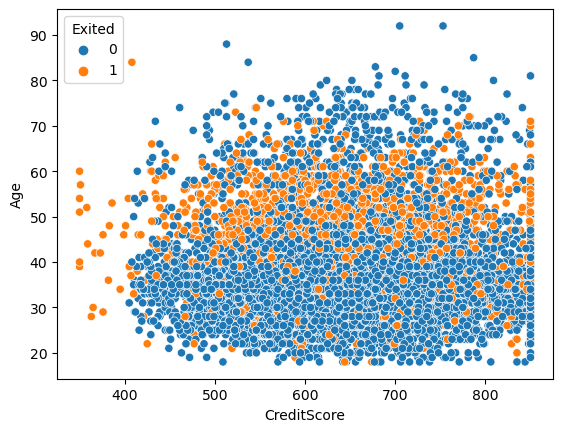

In [15]:
import seaborn as sns

data = df[['CreditScore', 'Age', 'Exited',]]
print(data.head(10))
sns.scatterplot(data = data, x ='CreditScore', y = 'Age', hue = 'Exited')

In [16]:
from sklearn.preprocessing import LabelEncoder
for col in df.columns:
  if df[col].dtype == 'O':
    label_encode = LabelEncoder()
    df[col] = label_encode.fit_transform(df[col])
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,1115,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,1177,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,2040,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,289,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,1822,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,1999,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,1336,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,1570,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,2345,772,1,1,42,3,75075.31,2,1,0,92888.52,1


In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
#Splitting the data
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test = train_test_split(df.drop('Exited',axis=1), df['Exited'], test_size = 0.2, random_state = 101)

In [18]:
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86      1577
           1       0.48      0.52      0.50       423

    accuracy                           0.78      2000
   macro avg       0.67      0.69      0.68      2000
weighted avg       0.79      0.78      0.78      2000



In [19]:
smote = SMOTE(sampling_strategy='auto',k_neighbors=5,random_state = 101)
X_oversample, y_oversample = smote.fit_resample(X_train, y_train)

In [20]:
clf.fit(X_oversample,y_oversample)
y_predo=clf.predict(X_test)
print(classification_report(y_test, y_predo))

              precision    recall  f1-score   support

           0       0.89      0.78      0.83      1577
           1       0.44      0.64      0.52       423

    accuracy                           0.75      2000
   macro avg       0.66      0.71      0.67      2000
weighted avg       0.79      0.75      0.77      2000



In [21]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

print(classification_report(y_test, classifier.predict(X_test)))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88      1577
           1       0.00      0.00      0.00       423

    accuracy                           0.79      2000
   macro avg       0.39      0.50      0.44      2000
weighted avg       0.62      0.79      0.70      2000



c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [22]:

classifier.fit(X_oversample, y_oversample)
print(classification_report(y_test, classifier.predict(X_test)))

              precision    recall  f1-score   support

           0       0.84      0.47      0.61      1577
           1       0.25      0.66      0.36       423

    accuracy                           0.51      2000
   macro avg       0.55      0.57      0.49      2000
weighted avg       0.71      0.51      0.56      2000



   CreditScore  Age  Exited
0          619   42       1
1          608   41       0
2          502   42       1
3          699   39       0
4          850   43       0


<Axes: xlabel='Exited', ylabel='count'>

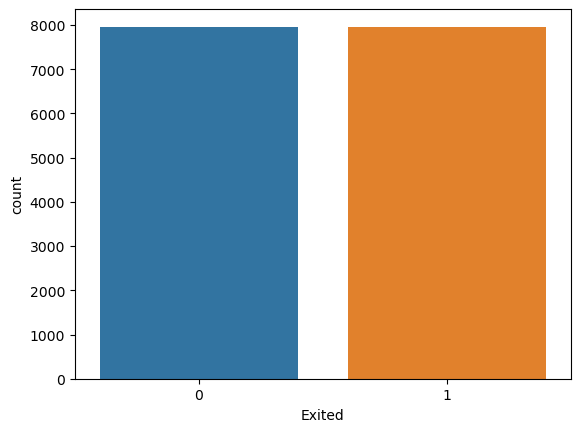

In [23]:
smote = SMOTE(random_state = 101)
X, y = smote.fit_resample(df[['CreditScore', 'Age']], df['Exited'])
#Creating a new Oversampling Data Frame
df_oversampler = pd.DataFrame(X, columns = ['CreditScore', 'Age'])
df_oversampler['Exited']=y
print(df_oversampler.head())

sns.countplot(data=df_oversampler,x='Exited')

In [24]:
from collections import Counter
X=df[['CreditScore', 'Age']]
y=df['Exited']

oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)


Counter({1: 7963, 0: 7963})


<Axes: xlabel='CreditScore', ylabel='Age'>

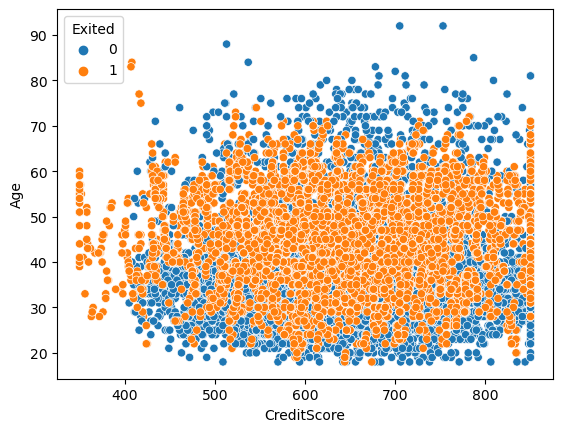

In [25]:
sns.scatterplot(data = df_oversampler, x ='CreditScore', y = 'Age', hue = 'Exited')